In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# here we have imported the neccesary library

In [43]:
calhouse = pd.read_csv('cleaned_california.csv')
calhouse.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [44]:
calhouse.head()
#displays the first 5 elements
# here we have the values of the cleaned data



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Since we have to calucalte and predict the value of the house we will take the median_house_value as the y variable

In [45]:
# since we are going to do training as well as the testing of the data
# we need to import some more libraires
from sklearn.model_selection import train_test_split

x = calhouse.drop(['median_house_value'], axis=1)
y = calhouse['median_house_value']
# here we have made the x and y train dataset.
# we have dropped the y train which is the median house value which will intern will be the hosue cost


In [46]:
X_train , X_test , y_train , y_test = train_test_split(x , y ,test_size=0.2)
trained_data = X_train.join(y_train)
# using this we are going to x train and y train mechanism where we have taken the size of 0.2
trained_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3254,-122.70,39.14,13.0,532.0,111.0,214.0,62.0,3.3929,INLAND,108300.0
1576,-121.96,37.85,10.0,3209.0,379.0,1199.0,392.0,12.2478,INLAND,500001.0
19013,-122.69,38.44,31.0,1808.0,315.0,691.0,280.0,3.8583,<1H OCEAN,193200.0
8855,-118.45,34.02,41.0,2956.0,700.0,1212.0,645.0,3.4583,<1H OCEAN,421900.0
8286,-118.35,33.96,26.0,2773.0,681.0,1560.0,631.0,3.1354,<1H OCEAN,164300.0
...,...,...,...,...,...,...,...,...,...,...
16473,-120.90,35.33,16.0,1576.0,287.0,595.0,262.0,3.5880,NEAR OCEAN,266300.0
14838,-116.99,32.72,15.0,825.0,130.0,334.0,131.0,4.0391,<1H OCEAN,169500.0
3223,-119.90,36.20,43.0,187.0,38.0,106.0,40.0,1.8750,INLAND,137500.0
15907,-122.48,37.75,52.0,2515.0,494.0,1583.0,477.0,4.3393,NEAR BAY,317600.0


Here we have created a new train test and split column and made the median value.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

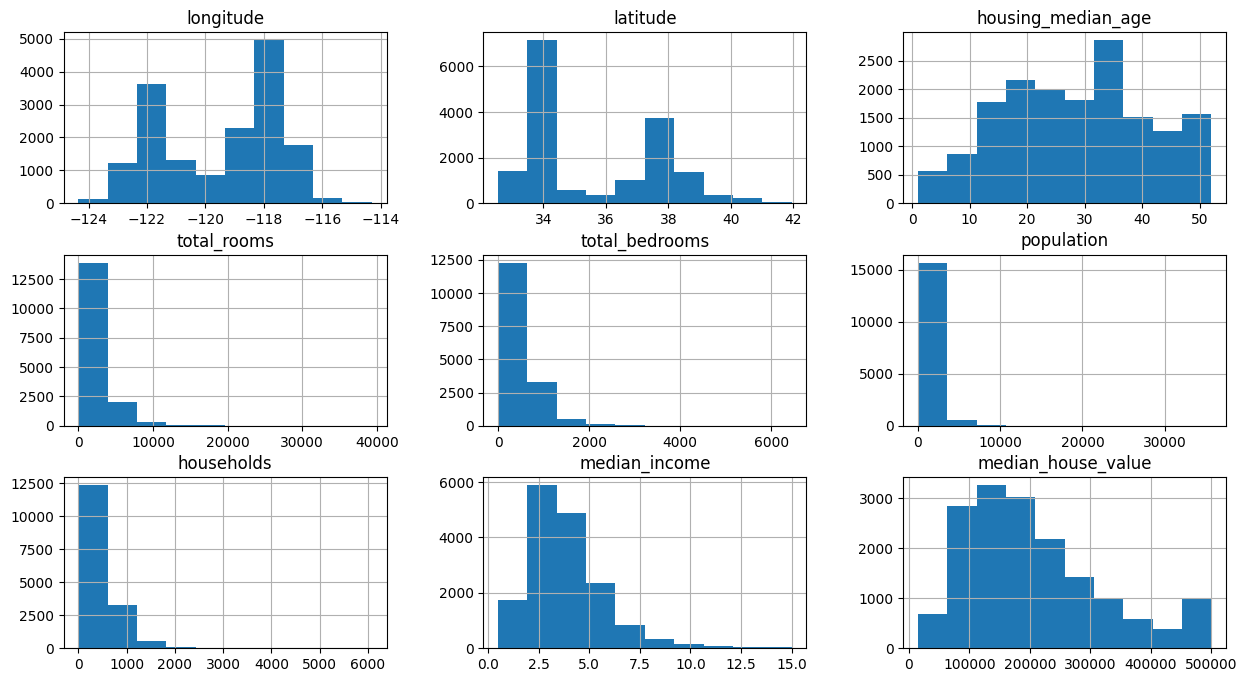

In [47]:
trained_data.hist(figsize=(15 , 8))
# Here we have made the figsize where each variable has been compared with the y trained variable

# Now that we have created a base model we are going to do some data Preprocessing


In [48]:
trained_data['total_rooms'] = np.log(trained_data['total_rooms'] +1)
trained_data['total_bedrooms'] = np.log(trained_data['total_bedrooms'] +1)
trained_data['population'] = np.log(trained_data['population'] +1)
trained_data['households'] = np.log(trained_data['households'] +1)
# this helps the transformation to normalize the skewed data.It makes it more suitbale for making linear models.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

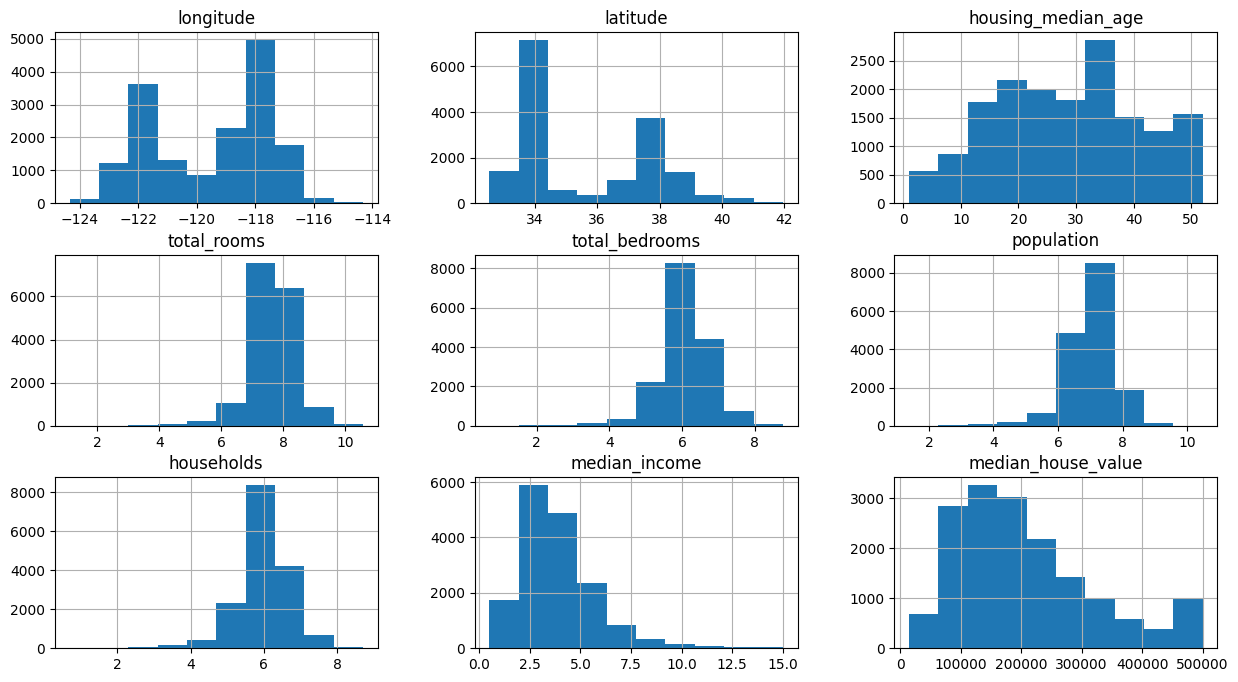

In [49]:
trained_data.hist(figsize = (15 , 8))
# this is going to print the graphs of the the given varibales.


# Here we have made the hist of the plot data

In [50]:
trained_data.columns
# here we have a coloumn called as ocean proximity which is a string value varible.

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

So we are going to take this out and instead of the values we are going to take the numbers as input

In [51]:
# here we are going to count the no of times each of the ocean promximity values was there
trained_data.ocean_proximity.value_counts()
# we have got the values of the given varibale 
# these are the counts of the 


ocean_proximity
<1H OCEAN     7229
INLAND        5159
NEAR OCEAN    2108
NEAR BAY      1845
ISLAND           5
Name: count, dtype: int64

In [52]:
pd.get_dummies(trained_data.ocean_proximity).astype(int)


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3254,0,1,0,0,0
1576,0,1,0,0,0
19013,1,0,0,0,0
8855,1,0,0,0,0
8286,1,0,0,0,0
...,...,...,...,...,...
16473,0,0,0,0,1
14838,1,0,0,0,0
3223,0,1,0,0,0
15907,0,0,0,1,0


now what we have to do is asign the values of the ocean proximity to the new values and make seperate columns for each of the values of the count.

In [53]:
trained_data = trained_data.join(pd.get_dummies(trained_data.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis = 1)

In [54]:
trained_data
# and here we see that we have 1 as for the value which is there for that house
# and 0 for

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3254,-122.70,39.14,13.0,6.278521,4.718499,5.370638,4.143135,3.3929,108300.0,0,1,0,0,0
1576,-121.96,37.85,10.0,8.074026,5.940171,7.090077,5.973810,12.2478,500001.0,0,1,0,0,0
19013,-122.69,38.44,31.0,7.500529,5.755742,6.539586,5.638355,3.8583,193200.0,1,0,0,0,0
8855,-118.45,34.02,41.0,7.991931,6.552508,7.100852,6.470800,3.4583,421900.0,1,0,0,0,0
8286,-118.35,33.96,26.0,7.928046,6.525030,7.353082,6.448889,3.1354,164300.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16473,-120.90,35.33,16.0,7.363280,5.662960,6.390241,5.572154,3.5880,266300.0,0,0,0,0,1
14838,-116.99,32.72,15.0,6.716595,4.875197,5.814131,4.882802,4.0391,169500.0,1,0,0,0,0
3223,-119.90,36.20,43.0,5.236442,3.663562,4.672829,3.713572,1.8750,137500.0,0,1,0,0,0
15907,-122.48,37.75,52.0,7.830426,6.204558,7.367709,6.169611,4.3393,317600.0,0,0,0,1,0


<Axes: >

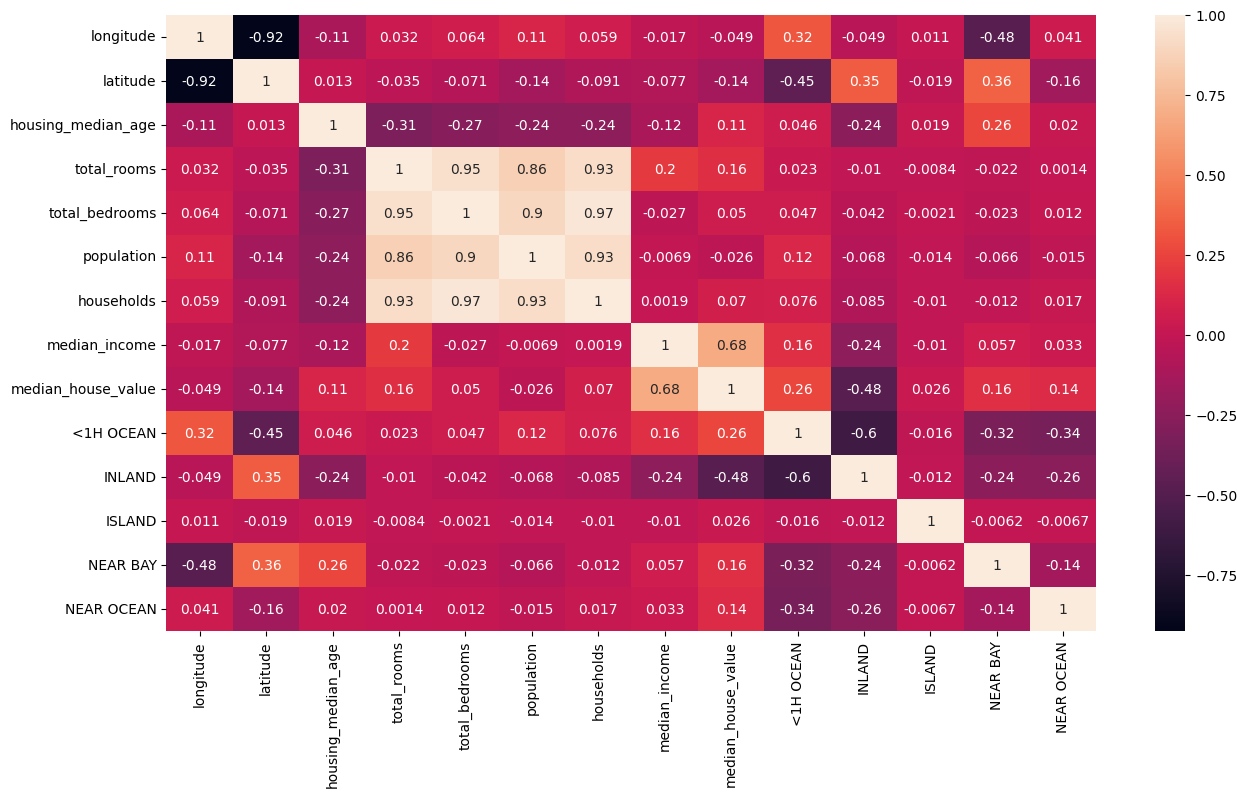

In [55]:
# creating a heatmap for the newly trained tata
plt.figure(figsize=(15 ,8))
sns.heatmap(trained_data.corr() , annot= True)
# from here we can see the correlation of the house values in the various parts.



 after plotting there heat map we can see a few conclusions, like at the ocen away and the meadian house value
 we see that the values increses as we go towards the ocean level

<Axes: xlabel='latitude', ylabel='longitude'>

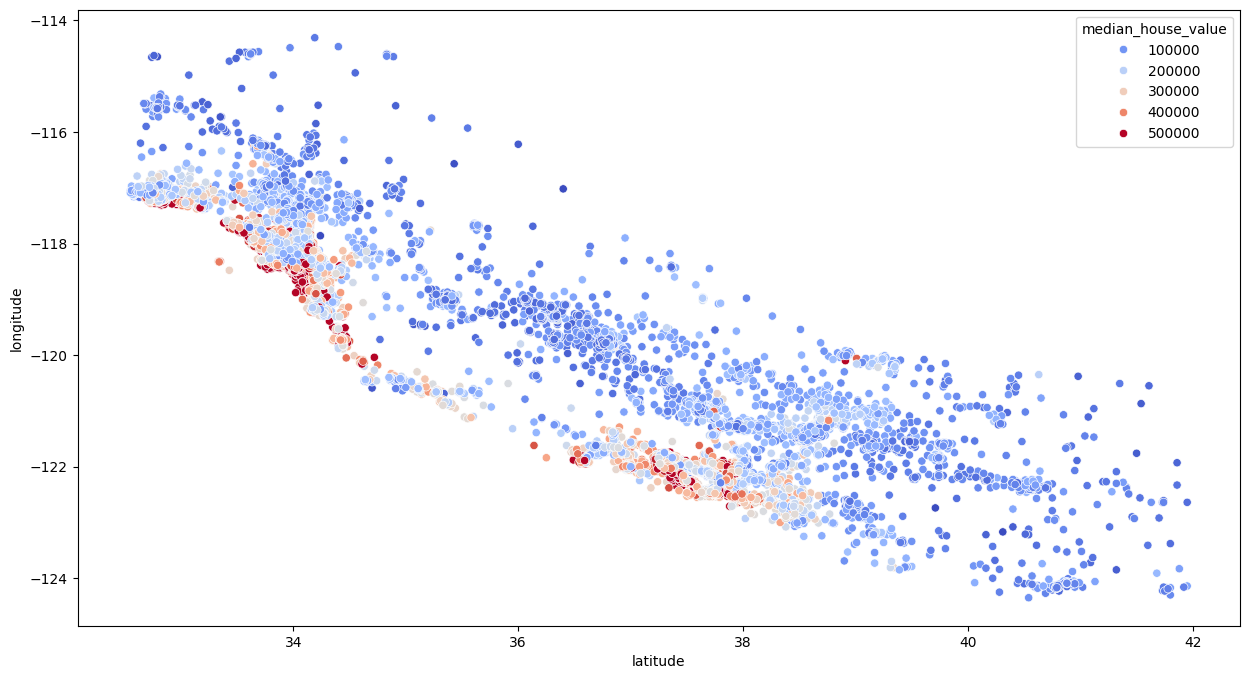

In [56]:
plt.figure(figsize=(15 , 8))
sns.scatterplot(x = "latitude" , y="longitude" , data=trained_data , hue="median_house_value" , palette="coolwarm")

Here we have created a scatter plot which shows the latitude in the x axis. Now the latitude means the part of the area which is away from the sea. Now the blue part represents the cost of the house.The dark green dot represents the cost of the most expensive housing which are near to the sea or on a hill

In [57]:
from IPython.display import FileLink
# to take the new  and cleaned dataset form the given part

In [63]:
cleaned_file_path = 'california_linear.csv'
trained_data.to_csv(cleaned_file_path, index=False)
FileLink(cleaned_file_path)

/Users/Lenovo/Desktop/4 sem/-linear-regression-model/california_linear.csv

# Now we are going to make the linear regreassion plot after this

In [59]:
from sklearn.linear_model import LinearRegression

X_train , y_train = trained_data.drop(['median_house_value'],axis = 1), trained_data['median_house_value']
# here we have taken the 
reg = LinearRegression()
# loading the liner regression model and library

reg.fit(X_train , y_train)

# here we have linear regression trained the model 

LinearRegression()

In [60]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()

forest_model.fit(X_train , y_train)



RandomForestRegressor()